<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0315/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from keras import XXX
-> from tensorflow.keras import xx

In [97]:
from tensorflow.keras.datasets import mnist
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [98]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


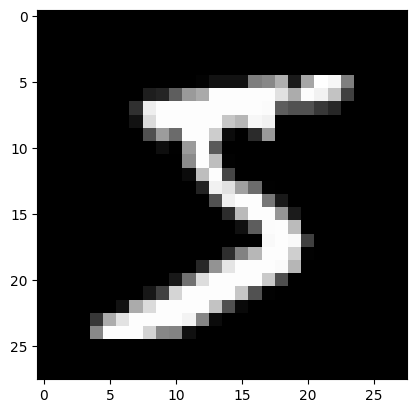

In [99]:
# colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")

## 激活函式的選擇很重要

1. 輸出層: 看狀況, 分類: a. 互斥(softmax) b. 不互斥(sigmoid)
2. 中間層: relu family(m=1)

In [100]:
# models(地基): Sequential(一層疊一層) Model(自由疊層)
# layers: Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


$ p_i = 正確答案 $

$ q_i = 預測值 $

$ categorical crossentropy(標準ce) = \sum p_i log\frac{1}{q_i}$

如果你最後輸出只有一個的時候你要使用 BinaryCrossentropy

因為你輸出的q -> q: 1這種東西 (1-q): 另外一種東西

$ binary crossentropy = p log \frac {1}{q} + (1-p) log \frac {1}{1-q} $ 

In [101]:
# crossentropy:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [102]:
# y
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [103]:
import numpy as np
# tensorflow建議: x(0~1) x(-1~1)
# tensorflow隨機的weight有配合
# reshape你可以把一個位置替換成-1(讓他自己算)
# x_train.reshape(60000, 784)
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [104]:
# epochs: 決定要把整份資料看過幾輪
# 絕對不是越多越好, 越多越過擬和, 反而導致現實資料錯更多
# validation_split: 擬要切出一部分不給模型看, 來驗證這組參數表現得如何
# 一輪: 54000(90%) / 100 -> 540
# 10 epochs: 540 * 10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("mnist.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
540/540 [==============================] - 2s 3ms/step - loss: 0.2901 - accuracy: 0.9179 - val_loss: 0.1328 - val_accuracy: 0.9638
Epoch 2/40
540/540 [==============================] - 2s 3ms/step - loss: 0.1258 - accuracy: 0.9629 - val_loss: 0.0972 - val_accuracy: 0.9718
Epoch 3/40
540/540 [==============================] - 2s 3ms/step - loss: 0.0848 - accuracy: 0.9749 - val_loss: 0.0775 - val_accuracy: 0.9765
Epoch 4/40
540/540 [==============================] - 2s 3ms/step - loss: 0.0628 - accuracy: 0.9813 - val_loss: 0.0738 - val_accuracy: 0.9782
Epoch 5/40
540/540 [==============================] - 2s 4ms/step - loss: 0.0492 - accuracy: 0.9854 - val_loss: 0.0692 - val_accuracy: 0.9798
Epoch 6/40
540/540 [==============================] - 2s 3ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0654 - val_accuracy: 0.9813
Epoch 7/40
540/540 [==============================] - 2s 4ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0718 - val_accuracy: 0.9795
Epoch 

In [105]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0675 - accuracy: 0.9792


[0.06750909984111786, 0.979200005531311]

如果你在tf裡, 你的答案都是帶one-hot encoding
不是的畫 都帶原本

In [106]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(i) for i in range(10)],
       columns=["{}(pred)".format(i) for i in range(10)])

313/313 [==============================] - 1s 1ms/step


,0(pred),1(pred),2(pred),3(pred),4(pred),5(pred),6(pred),7(pred),8(pred),9(pred)
0(true),970,0,2,0,1,2,2,1,2,0
1(true),0,1124,4,0,0,1,2,2,2,0
2(true),3,2,1003,0,5,0,3,9,7,0
3(true),0,0,6,988,0,3,0,5,5,3
4(true),2,0,2,0,965,0,3,2,0,8
5(true),3,0,0,8,1,872,4,1,2,1
6(true),4,3,1,1,7,4,935,0,3,0
7(true),1,4,5,1,0,0,0,1012,2,3
8(true),3,0,2,6,4,3,2,6,945,3
9(true),3,4,0,6,6,4,0,7,1,978


In [107]:
# 如果你不帶參數, 他會展開成為一個list, 把最大位置列出來
# 如果你帶入axis這個參數, axis=0, 直的看, 找最大值所在位置
#             axis=1(-1), 橫的看
np.array([
    [1, 3],
    [0.5, 2]
]).argmax(axis=1)

array([1, 1])

In [108]:
# demo: nonzero
np.nonzero(np.array([
    [0, 1],
    [0, 0],
    [0, 2]
]))

(array([0, 2]), array([1, 1]))

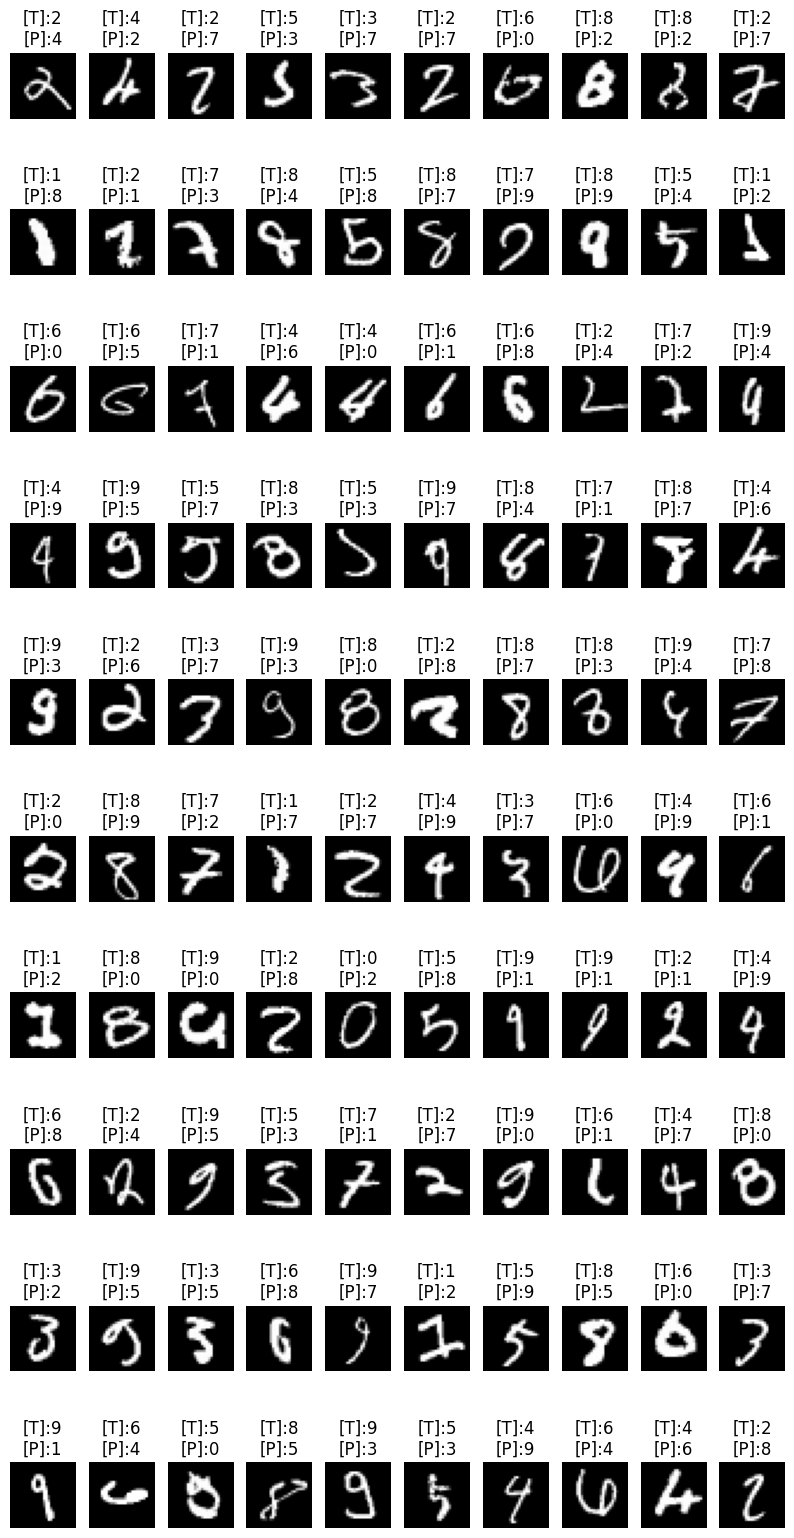

In [109]:
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(10, 20))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(fp_true[i], fp_pred[i])
    plt.title(t)
    plt.imshow(fp_img[i], cmap="gray")

In [110]:
Image.frombytes("L", (28, 28), x_test[0]).save("test.png")

In [111]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# testx = x_test[0].reshape(1, 784) / 255.0
# model.predict(testx)

1/1 [==============================] - 0s 26ms/step


array([[3.0298814e-08, 3.0838105e-09, 3.3004460e-06, 3.8464423e-05,
        4.1017042e-12, 1.0118736e-08, 2.0306031e-12, 9.9995744e-01,
        1.2158435e-07, 6.2502664e-07]], dtype=float32)

1/1 [==============================] - 0s 29ms/step
0 的機率是: 0.0
1 的機率是: 0.0
2 的機率是: 1e-04
3 的機率是: 0.0
4 的機率是: 0.0
5 的機率是: 0.0004
6 的機率是: 0.9994
7 的機率是: 0.0
8 的機率是: 1e-04
9 的機率是: 0.0
最高機率是: 6


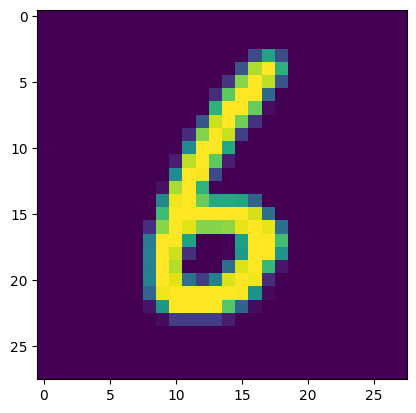

In [116]:
from PIL import Image
fn = "test.png" #@param {type:"string"}
img = Image.open(fn).resize((28, 28)).convert("L")
img_np = np.array(img)
testx = img_np.reshape(1, 784) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(i, "的機率是:", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是:", ans)
plt.imshow(img_np)